In [1]:
#Setting up any and all dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

#Reading CSV files 
payroll_df = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv")
budget_df = pd.read_csv("Expense_Budget.csv")
budget_df.head()

#Code for setting up API as well
#url = "https://data.ny.gov/resource/k397-673e.json"
#payroll_df = requests.get(url).json()
#payroll_df =pd.DataFrame(payroll_df)
#payroll_df


,Publication Date,Fiscal Year,Agency Number,Agency Name,Unit Appropriation Number,Unit Appropriation Name,Budget Code Number,Budget Code Name,Object Class Number,Object Class Name,...,Financial Plan Savings Flag,Adopted Budget Amount,Current Modified Budget Amount,Financial Plan Amount,Adopted Budget Position,Current Modified Budget Position,Financial Plan Position,Adopted Budget - Number of Contracts,Current Modified Budget - Number of Contracts,Financial Plan - Number of Contracts
0,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,320.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,9750.0,8950.0,9750.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,4500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,15390.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [2]:
#Check out how many agencies are in this file
num_of_agencies = budget_df["Agency Name"].nunique()
num_of_agencies = budget_df["Agency Name"].value_counts()

In [3]:
#Agency budgets by year; Create a table that shows each agency's budget by year (2017, 2018, 2019)  

#Group agencies by year (2017, 2018, 2019)
agencies_2017 = budget_df.loc[budget_df["Fiscal Year"] == 2017].groupby("Agency Name")
agencies_2018 = budget_df.loc[budget_df["Fiscal Year"] == 2018].groupby("Agency Name")
agencies_2019 = budget_df.loc[budget_df["Fiscal Year"] == 2019].groupby("Agency Name")

#Sum up each agency's budget by year
budget_2017 = pd.DataFrame(agencies_2017["Current Modified Budget Amount"].sum())
budget_2018 = pd.DataFrame(agencies_2018["Current Modified Budget Amount"].sum())
budget_2019 = pd.DataFrame(agencies_2019["Current Modified Budget Amount"].sum())

#Merge into one dataframe
budget_by_year = pd.merge(budget_2017, budget_2018, on="Agency Name")
budget_by_year = pd.merge(budget_by_year, budget_2019, on="Agency Name")
budget_by_year.columns = ["2017", "2018", "2019"]

budget_by_year = budget_by_year.sort_values(by=["2017"], ascending=False)
budget_by_year.head()

,2017,2018,2019
Agency Name,,,
DEPARTMENT OF EDUCATION,4.421820e+10,7.001744e+10,7.379264e+10
DEPARTMENT OF SOCIAL SERVICES,1.906238e+10,2.910364e+10,2.975823e+10
MISCELLANEOUS,1.893024e+10,2.912227e+10,2.980799e+10
PENSION CONTRIBUTIONS,1.862823e+10,2.823016e+10,2.879398e+10
POLICE DEPARTMENT,1.103449e+10,1.658441e+10,1.743227e+10


In [5]:
#Reverse rows to get top 15 in descending order to barh chart
row = budget_by_year.iloc[0:15]
row2 = row.iloc[::-1]
print(row)

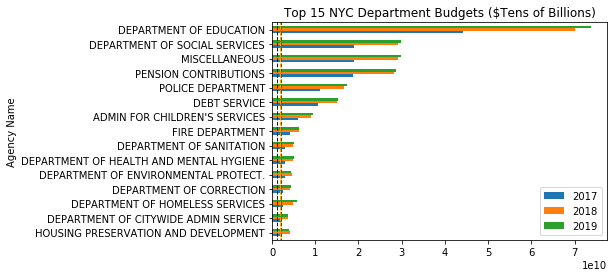

In [7]:
#Caluclate annual averages
avg_budget_2017 = budget_by_year["2017"].mean()
avg_budget_2018 = budget_by_year["2018"].mean()
avg_budget_2019 = budget_by_year["2019"].mean()

# Generate the Plot
row2.plot(kind='barh')
plt.title("Top 15 NYC Department Budgets ($Tens of Billions)")
plt.plot([avg_budget_2017, avg_budget_2017],[-1,15], linestyle='--', lw=1, color='blue')
plt.plot([avg_budget_2018, avg_budget_2018],[-1,15], linestyle='--', lw=1, color='orange')
plt.plot([avg_budget_2019, avg_budget_2019],[-1,15], linestyle='--', lw=1, color='green')
#plt.show()

# Save the Figure
plt.savefig("Agency_Budget_by_Year.png")

In [24]:
#See what's going on w/ misc. 
misc_budget_df = pd.read_csv("Expense_Budget.csv", index_col ="Agency Name")
misc_df = misc_budget_df.loc[["MISCELLANEOUS"]] 

misc_df.head()

misc_spending = misc_df["Budget Code Name"].value_counts()


In [14]:
#Agency budgets by year; Create a table that shows each agency's budget by year (2017, 2018, 2019)  

#Group agencies by year (2017, 2018, 2019)
misc_2017 = misc_df.loc[misc_df["Fiscal Year"] == 2017].groupby("Budget Code Name")
misc_2018 = misc_df.loc[misc_df["Fiscal Year"] == 2018].groupby("Budget Code Name")
misc_2019 = misc_df.loc[misc_df["Fiscal Year"] == 2019].groupby("Budget Code Name")

#Sum up each agency's budget by year
misc_budget_2017 = pd.DataFrame(misc_2017["Current Modified Budget Amount"].sum())
misc_budget_2018 = pd.DataFrame(misc_2018["Current Modified Budget Amount"].sum())
misc_budget_2019 = pd.DataFrame(misc_2019["Current Modified Budget Amount"].sum())

#budget_by_year.columns = ["2017", "2018", "2019"]

misc_budget_2017 = misc_budget_2017.sort_values(by=["Current Modified Budget Amount"], ascending=False)
misc_budget_2018 = misc_budget_2018.sort_values(by=["Current Modified Budget Amount"], ascending=False)
misc_budget_2019 = misc_budget_2019.sort_values(by=["Current Modified Budget Amount"], ascending=False)

,Current Modified Budget Amount
Budget Code Name,
FRINGE BENEFITS,7.246929e+09
RETIREE HEALTH BENEFITS TRUST,3.829307e+09
SPECIAL RESERVES,1.849186e+09
STATE BUILDING AID,1.210082e+09
PERSONAL SERVICES,1.209175e+09


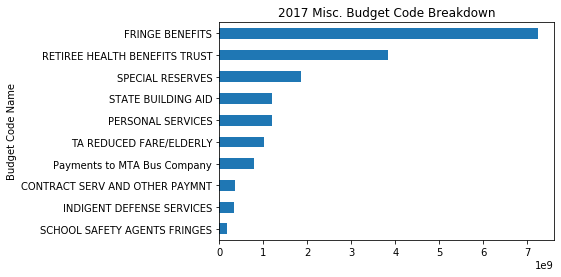

In [23]:
row = misc_budget_2017.iloc[0:10].iloc[::-1]
row.plot(kind='barh', legend=False)
plt.title("2017 Misc. Budget Code Breakdown")
plt.savefig("2017_Misc_Budget.png")

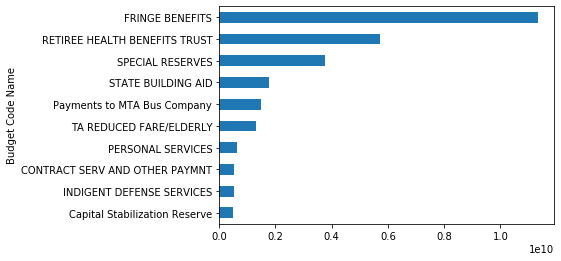

In [20]:
row = misc_budget_2018.iloc[0:10].iloc[::-1]
row.plot(kind='barh', legend=False)
plt.show()

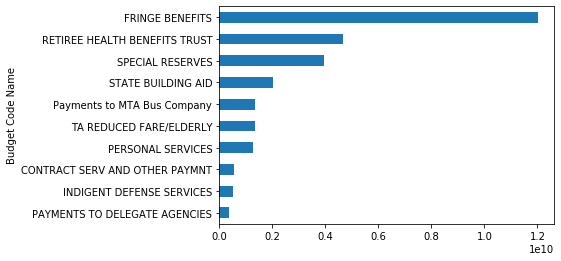

In [21]:
row = misc_budget_2019.iloc[0:10].iloc[::-1]
row.plot(kind='barh', legend=False)
plt.show()